In [35]:
import matplotlib.pyplot as plt

In [127]:
import pandas as pd
import numpy as np

In [83]:
fileSummaryOrigine = pd.read_csv("output/sumoSummary_01_origin.csv", sep=";")
fileSummaryIntel = pd.read_csv("output/sumoSummary_01_intel.csv", sep=";")
fileSummaryturnoff = pd.read_csv("output/sumoSummary_01_turnoff.csv", sep=";")
fileSummary3 = pd.read_csv("output/sumoSummary_01_2.csv", sep=";")


In [98]:
fileSummaryOrigine.head()

,step_arrived,step_collisions,step_duration,step_ended,step_halting,step_inserted,step_loaded,step_meanSpeed,step_meanSpeedRelative,step_meanTravelTime,step_meanWaitingTime,step_running,step_stopped,step_teleports,step_time,step_waiting
0,0,0,1623120718679,0,0,0,1,-1.00,-1.00,-1.0,-1.0,0,0,0,0.0,0
1,0,0,1623120718779,0,0,1,139,29.45,1.06,-1.0,1.0,1,0,0,1.0,0
2,0,0,1623120718880,0,0,1,139,28.29,1.02,-1.0,1.0,1,0,0,2.0,0
3,0,0,1623120718979,0,0,2,139,26.40,0.95,-1.0,1.0,2,0,0,3.0,0
4,0,0,1623120719080,0,0,2,139,23.69,0.85,-1.0,1.0,2,0,0,4.0,0


In [101]:
X_step = fileSummaryOrigine["step_time"]
Y_speed = fileSummaryOrigine["step_meanSpeed"]/0.27
Z_waiting = fileSummaryOrigine["step_waiting"]

x_step = fileSummaryIntel["step_time"]
y_speed = fileSummaryIntel["step_meanSpeed"]/0.27
z_waiting = fileSummaryIntel["step_waiting"]

x2_step = fileSummaryturnoff["step_time"]
y2_speed = fileSummaryturnoff["step_meanSpeed"]/0.27
z2_waiting = fileSummaryturnoff["step_waiting"]

x3_step = fileSummary3["step_time"]
y3_speed = fileSummary3["step_meanSpeed"]/0.27
z3_waiting = fileSummary3["step_waiting"]

In [ ]:
plt.rcParams['figure.facecolor'] = "white"

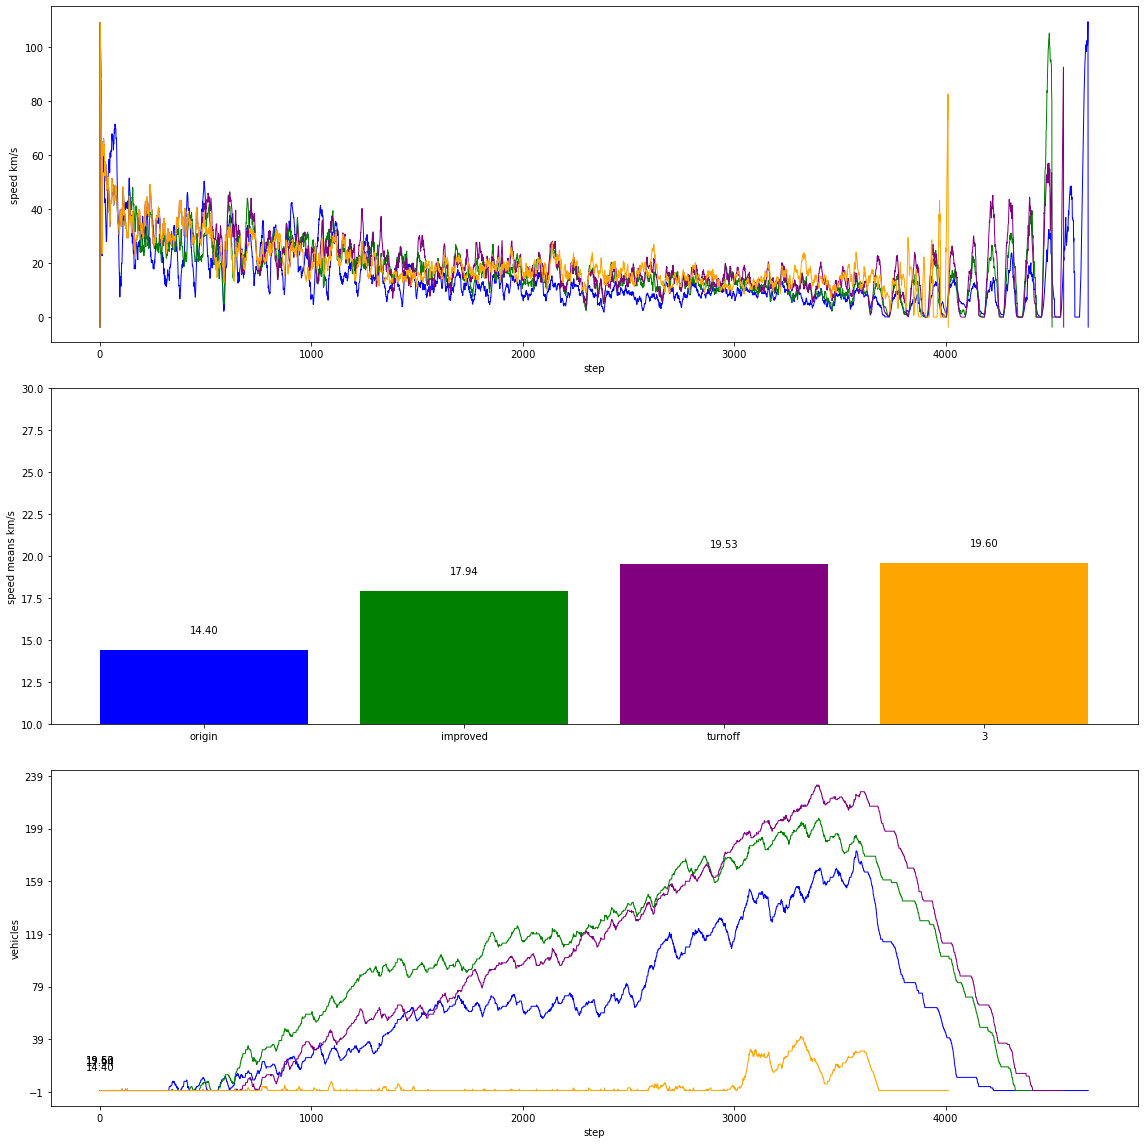

In [143]:
labels = ["origin", "improved", "turnoff", "3"]
colors = ["blue", "green", "purple", "orange"]
means = [Y_speed.mean(), y_speed.mean(), y2_speed.mean(), y3_speed.mean()]
waiting_list = [Z_waiting, z_waiting, z2_waiting, z3_waiting]
steps = [X_step, x_step, x2_step, x3_step]

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(16,16))
ax1.plot(X_step, Y_speed, color="blue", linewidth=1, label="origin")
ax1.plot(x_step, y_speed, color="green", linewidth=1, label="improved")
ax1.plot(x2_step, y2_speed, color="purple", linewidth=1, label="turnoff")
ax1.plot(x3_step, y3_speed, color="orange", linewidth=1, label="3")

ax2.bar(labels, means, color=colors)

ax3.plot(X_step, Z_waiting, color="blue", linewidth=1, label="origin")
ax3.plot(x_step, z_waiting, color="green", linewidth=1, label="improved")
ax3.plot(x2_step, z2_waiting, color="purple", linewidth=1, label="turnoff")
ax3.plot(x3_step, z3_waiting, color="orange", linewidth=1, label="3")

for index, data in enumerate(means):
    plt.text(x=index, y=data+1, s=f"{data:.2f}", fontdict=dict(fontsize=10), ha="center")
ax2.set_ylim(10, 30)
ax1.set_xlabel("step")
ax1.set_ylabel("speed km/s")
# plt.legend(loc="best")
ax2.set_ylabel("speed means km/s")

for index, data in enumerate(means):
    ax2.text(x=index, y=data+1, s=f"{data:.2f}", fontdict=dict(fontsize=10), ha="center")

ax3.set_xlabel("step")
ax3.set_ylabel("vehicles")
ax3.set_yticks(np.arange(-1,250, 40))

plt.tight_layout()
fig.savefig("foo.svg", format='svg', dpi=1200)
plt.show()

([<matplotlib.axis.YTick at 0x7f47e93e4190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

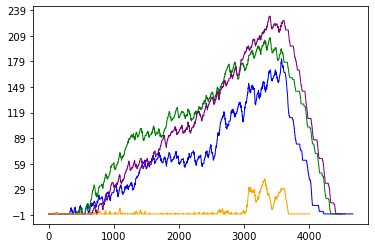

In [138]:
plt.plot(X_step, Z_waiting, color="blue", linewidth=1, label="origin")
plt.plot(x_step, z_waiting, color="green", linewidth=1, label="improved")
plt.plot(x2_step, z2_waiting, color="purple", linewidth=1, label="turnoff")
plt.plot(x3_step, z3_waiting, color="orange", linewidth=1, label="3")
plt.yticks(np.arange(-1,250,30))

In [124]:
z_waiting.mean()

97.16625971143175